Analysing titanic data set (28.09.2024)
link: https://www.kaggle.com/competitions/spaceship-titanic

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
%matplotlib inline
import seaborn as sns
sns.set()

In [203]:
import yaml

with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [204]:
train = pd.read_csv(cfg['spaceship_titanic']['train_dataset'])
test = pd.read_csv(cfg['spaceship_titanic']['test_dataset'])

# Исследование train

In [205]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [206]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [208]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Исследование test

In [209]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [211]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [255]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# EDA + Feature Engineering

Сделаем признаки Group (вычленим группу из PassangerId) и разобъём признак Cabin на составляющие 

In [212]:
train['Group'] = train.PassengerId.str.split("_").str[0]
train['Deck'] = train.Cabin.str.split("/").str[0]
train['Num'] = train.Cabin.str.split("/").str[1]
train['Side'] = train.Cabin.str.split("/").str[2]


train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


...и удалим ненужные признаки.

In [ ]:
train = train.drop(columns="PassengerId")
train = train.drop(columns="Cabin")

## Encode'им категориальные признаки

Сначала посмотрим на Home.

<Axes: ylabel='HomePlanet'>

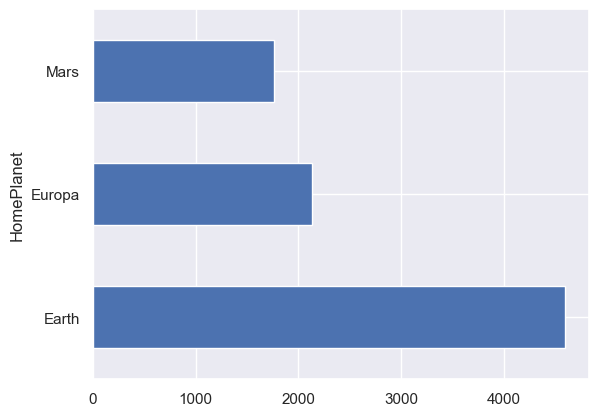

In [213]:
train.HomePlanet.value_counts().plot.barh()

<Axes: ylabel='HomePlanet'>

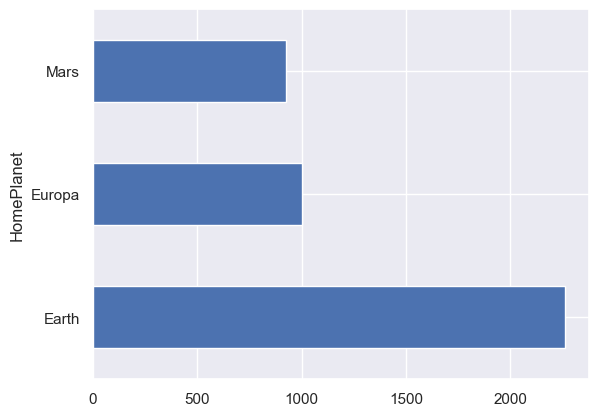

In [214]:
test.HomePlanet.value_counts().plot.barh()

И в train и в test одинаковый набор категорий, так что никаких сюрпризов в test не будет.

Вместо того, чтобы удалять aN можно заменить их в соответствии с частотой появления (опционально) (тут приведено как идея, полезность не исследовалась)

In [215]:
"""planet_distribution = train['HomePlanet'].value_counts(normalize=True)

def fill_na_with_proportion(column, distribution):
    return column.apply(lambda x: np.random.choice(distribution.index, p=distribution.values) if pd.isnull(x) else x)

train['HomePlanet'] = fill_na_with_proportion(train['HomePlanet'], planet_distribution)"""


"planet_distribution = train['HomePlanet'].value_counts(normalize=True)\n\ndef fill_na_with_proportion(column, distribution):\n    return column.apply(lambda x: np.random.choice(distribution.index, p=distribution.values) if pd.isnull(x) else x)\n\ntrain['HomePlanet'] = fill_na_with_proportion(train['HomePlanet'], planet_distribution)"

Для кодирования используем count encoder

<Axes: ylabel='HomePlanet'>

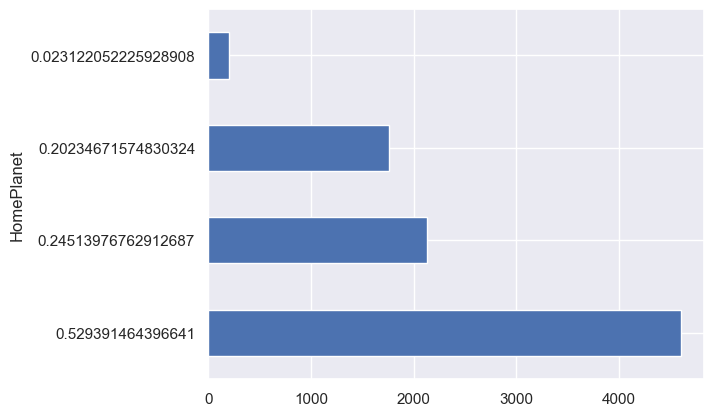

In [216]:
count_encoder = ce.CountEncoder(normalize=True)
train["HomePlanet"] = count_encoder.fit_transform(train['HomePlanet'], train['Transported'])

train["HomePlanet"].value_counts().plot.barh()


Теперь разберемся с Transported. Закодируем его Label Encoder'ом - благо в нем и так bool значения.

<Axes: ylabel='Transported'>

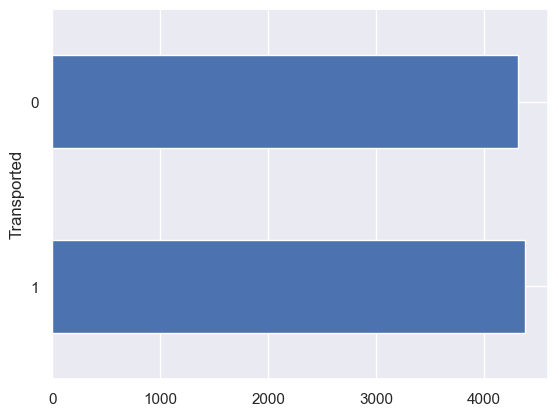

In [217]:
label_encoder = LabelEncoder()

train["Transported"] = label_encoder.fit_transform(train['Transported'])

train["Transported"].value_counts().plot.barh()

Теперь разберемся с VIP. Тут тоже поможет LabelEncoder.

<Axes: ylabel='VIP'>

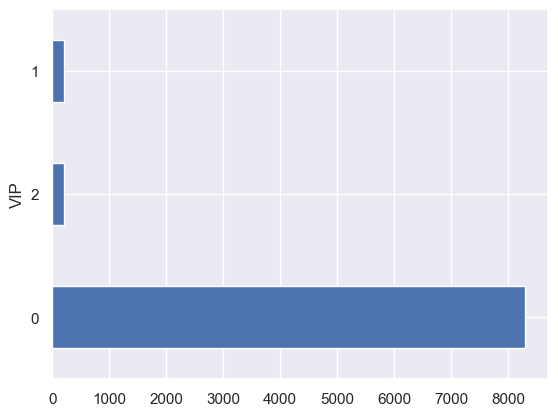

In [219]:
label_encoder = LabelEncoder()

train["VIP"] = label_encoder.fit_transform(train['VIP'])

train["VIP"].value_counts().plot.barh()

Теперь разбираемся с Deck, Side и Destination - тут снова Count Encoder.

<Axes: ylabel='Destination'>

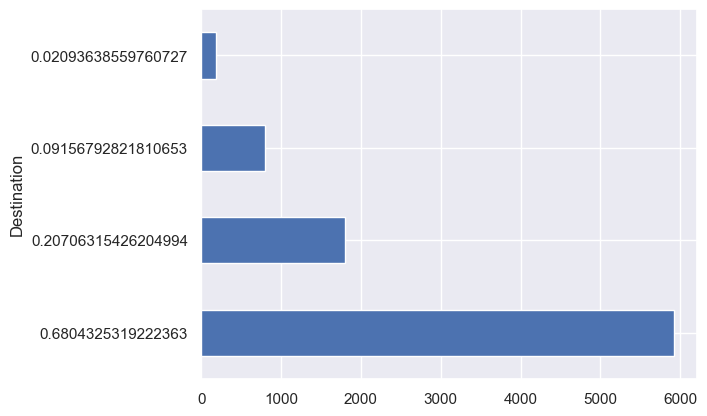

In [220]:
train["Deck"] = count_encoder.fit_transform(train['Deck'], train["Transported"])


train["Side"] = count_encoder.fit_transform(train['Side'], train["Transported"])
train["Destination"] = count_encoder.fit_transform(train['Destination'], train["Transported"])

train["Destination"].value_counts().plot.barh()

## Графики зависимости

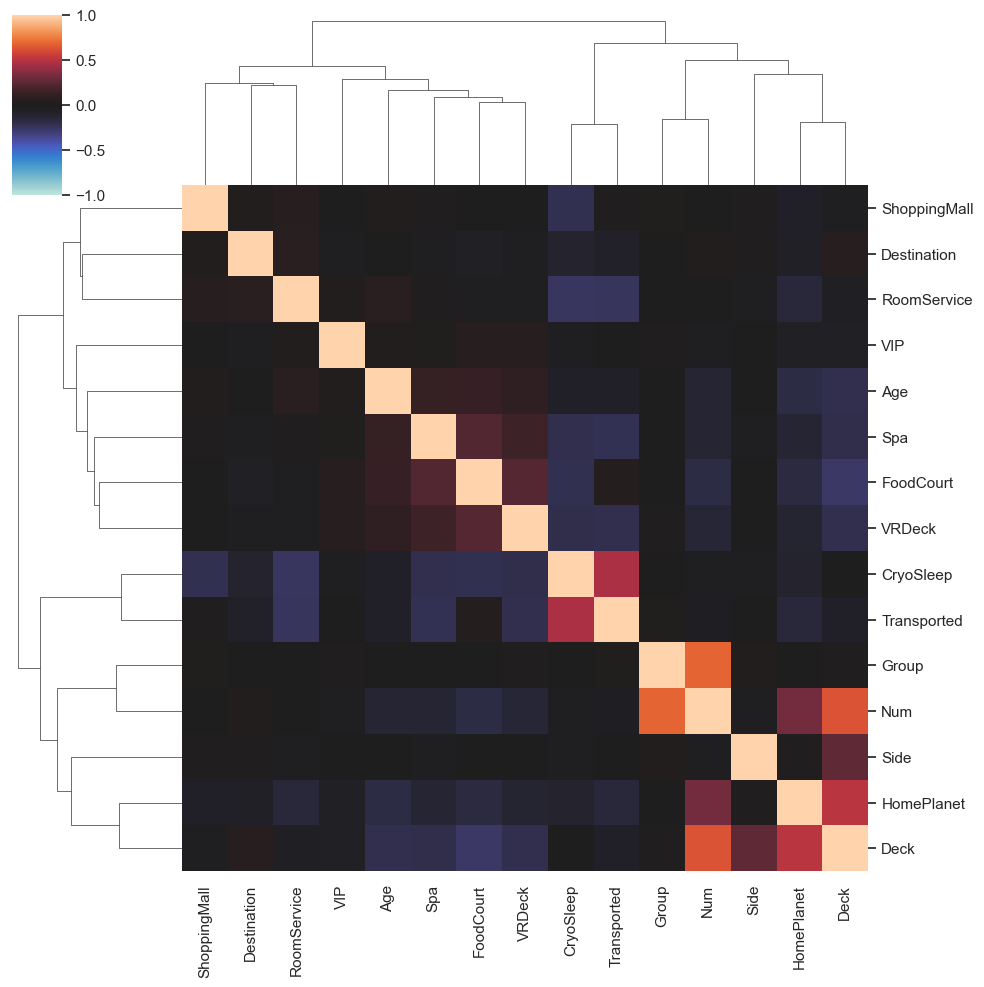

In [222]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(train, annot=None)

<Axes: >

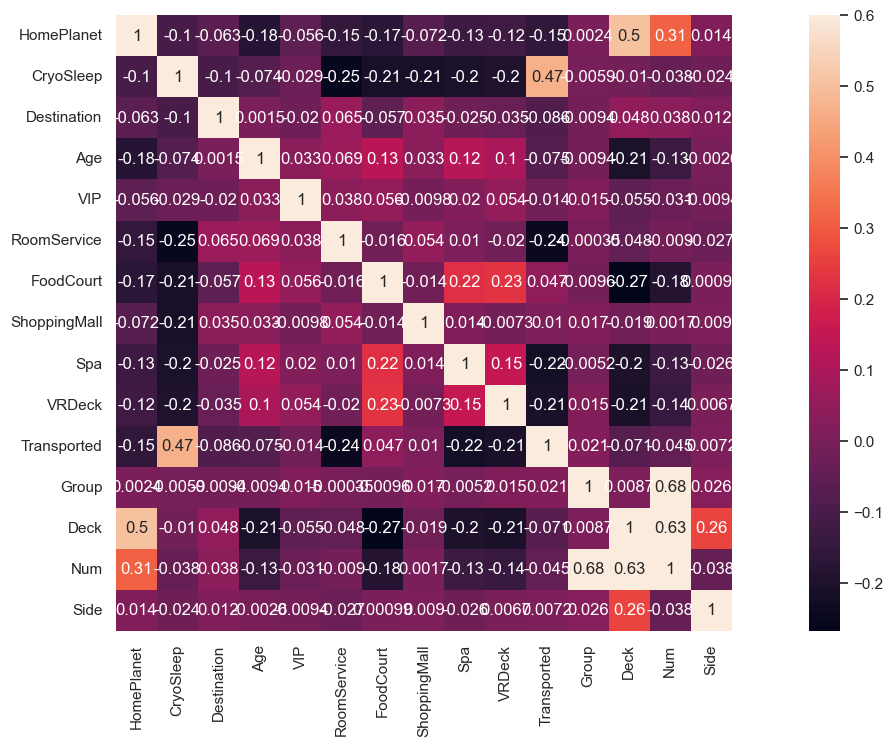

In [223]:
corr_matrix = train.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

Теперь рассмотрим зависимость Transported от значения признаков.

In [123]:
def plot_diff(df:pd.DataFrame, features, target):
    transported_0 = df[df[target] == 0]
    transported_1 = df[df[target] == 1]
    
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 2, figsize=(10, 5 * num_features))
    
    for i, feature in enumerate(features):
        sns.histplot(transported_0[feature], ax=axes[i, 0], kde=True)
        axes[i, 0].set_title(f'{feature} ({target} = 0)')
        
        sns.histplot(transported_1[feature], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f'{feature} ({target} = 1)')
    
    plt.tight_layout()
    plt.show()

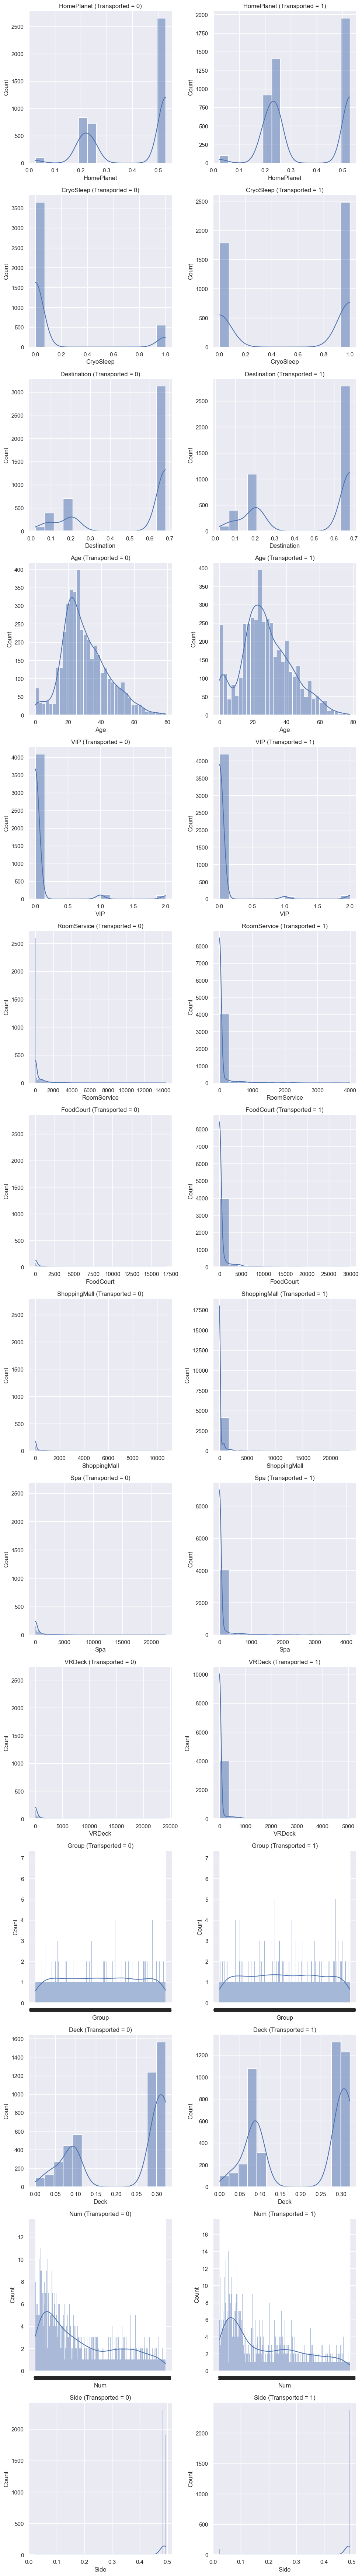

In [254]:
features = [col for col in train.columns if col != 'Transported']
plot_diff(train,features, "Transported") 

### Исследуем признаки RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

Преобразуем признаки RoomService, FoodCourt, ShoppingMall, Spa, VRDeck c помощью pd.cut в категориальные (по процентилям)

In [260]:
labels = [0, 1, 2]  # Названия категорий

f = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
hypotesis = train.copy()
for e in f:
    hypotesis[e] = pd.cut(train[e], bins=([train[e].quantile(i) for i in [0, 0.75, 0.90]] + [10 ** 10]), right=False, labels=labels, duplicates="drop")

Посмотрим на получившееся значения:

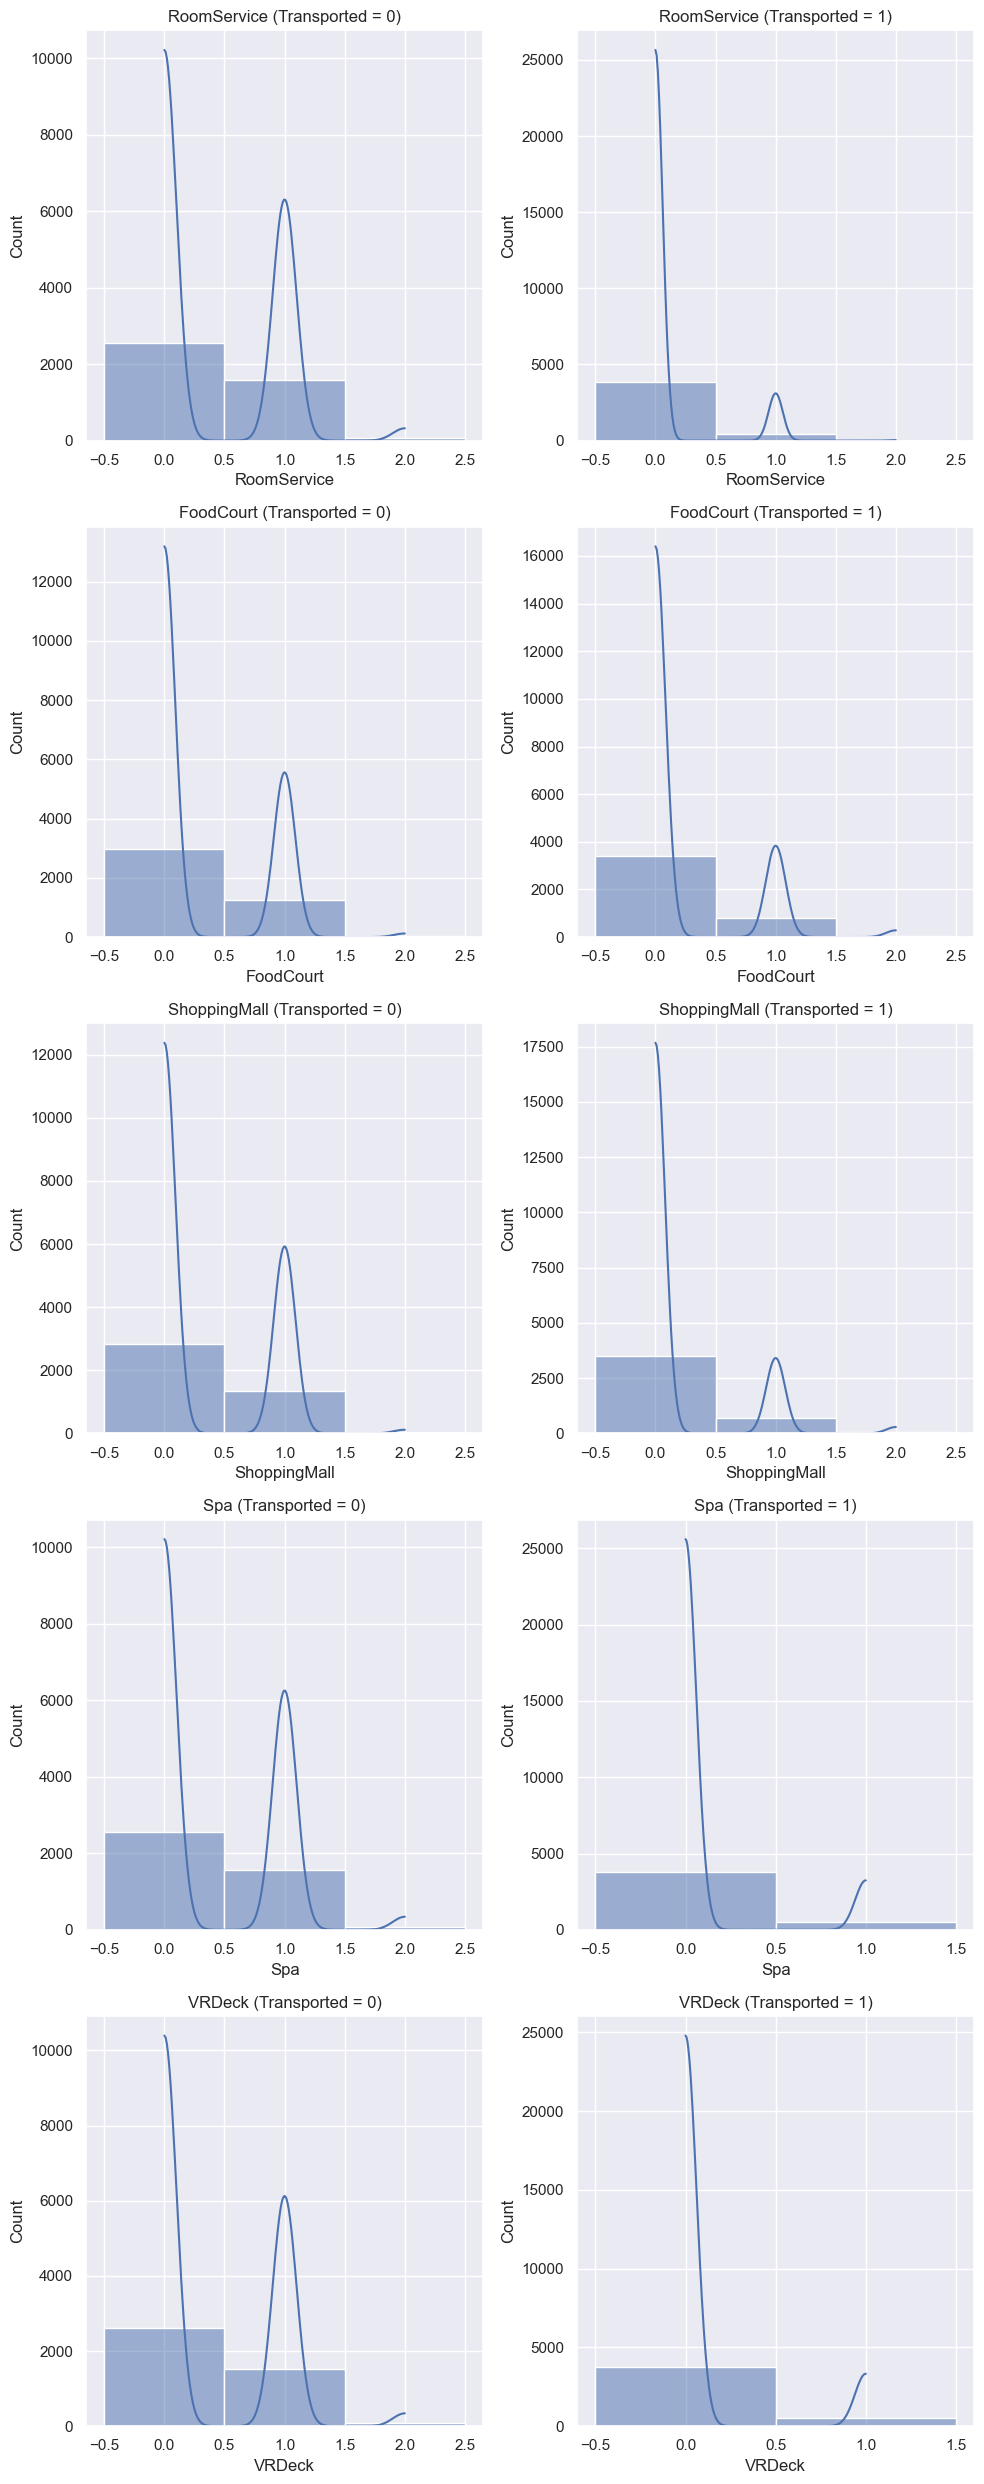

In [252]:
plot_diff(hypotesis, f, "Transported")

Из этих графиков видно, что если человек потратл много средств на SPA и VRDeck, то он гарантированно не транспортировался! Также эта обратная корреляция видна и в других графиках.

Посмотрим, как VIP влияет на потраченные средства:

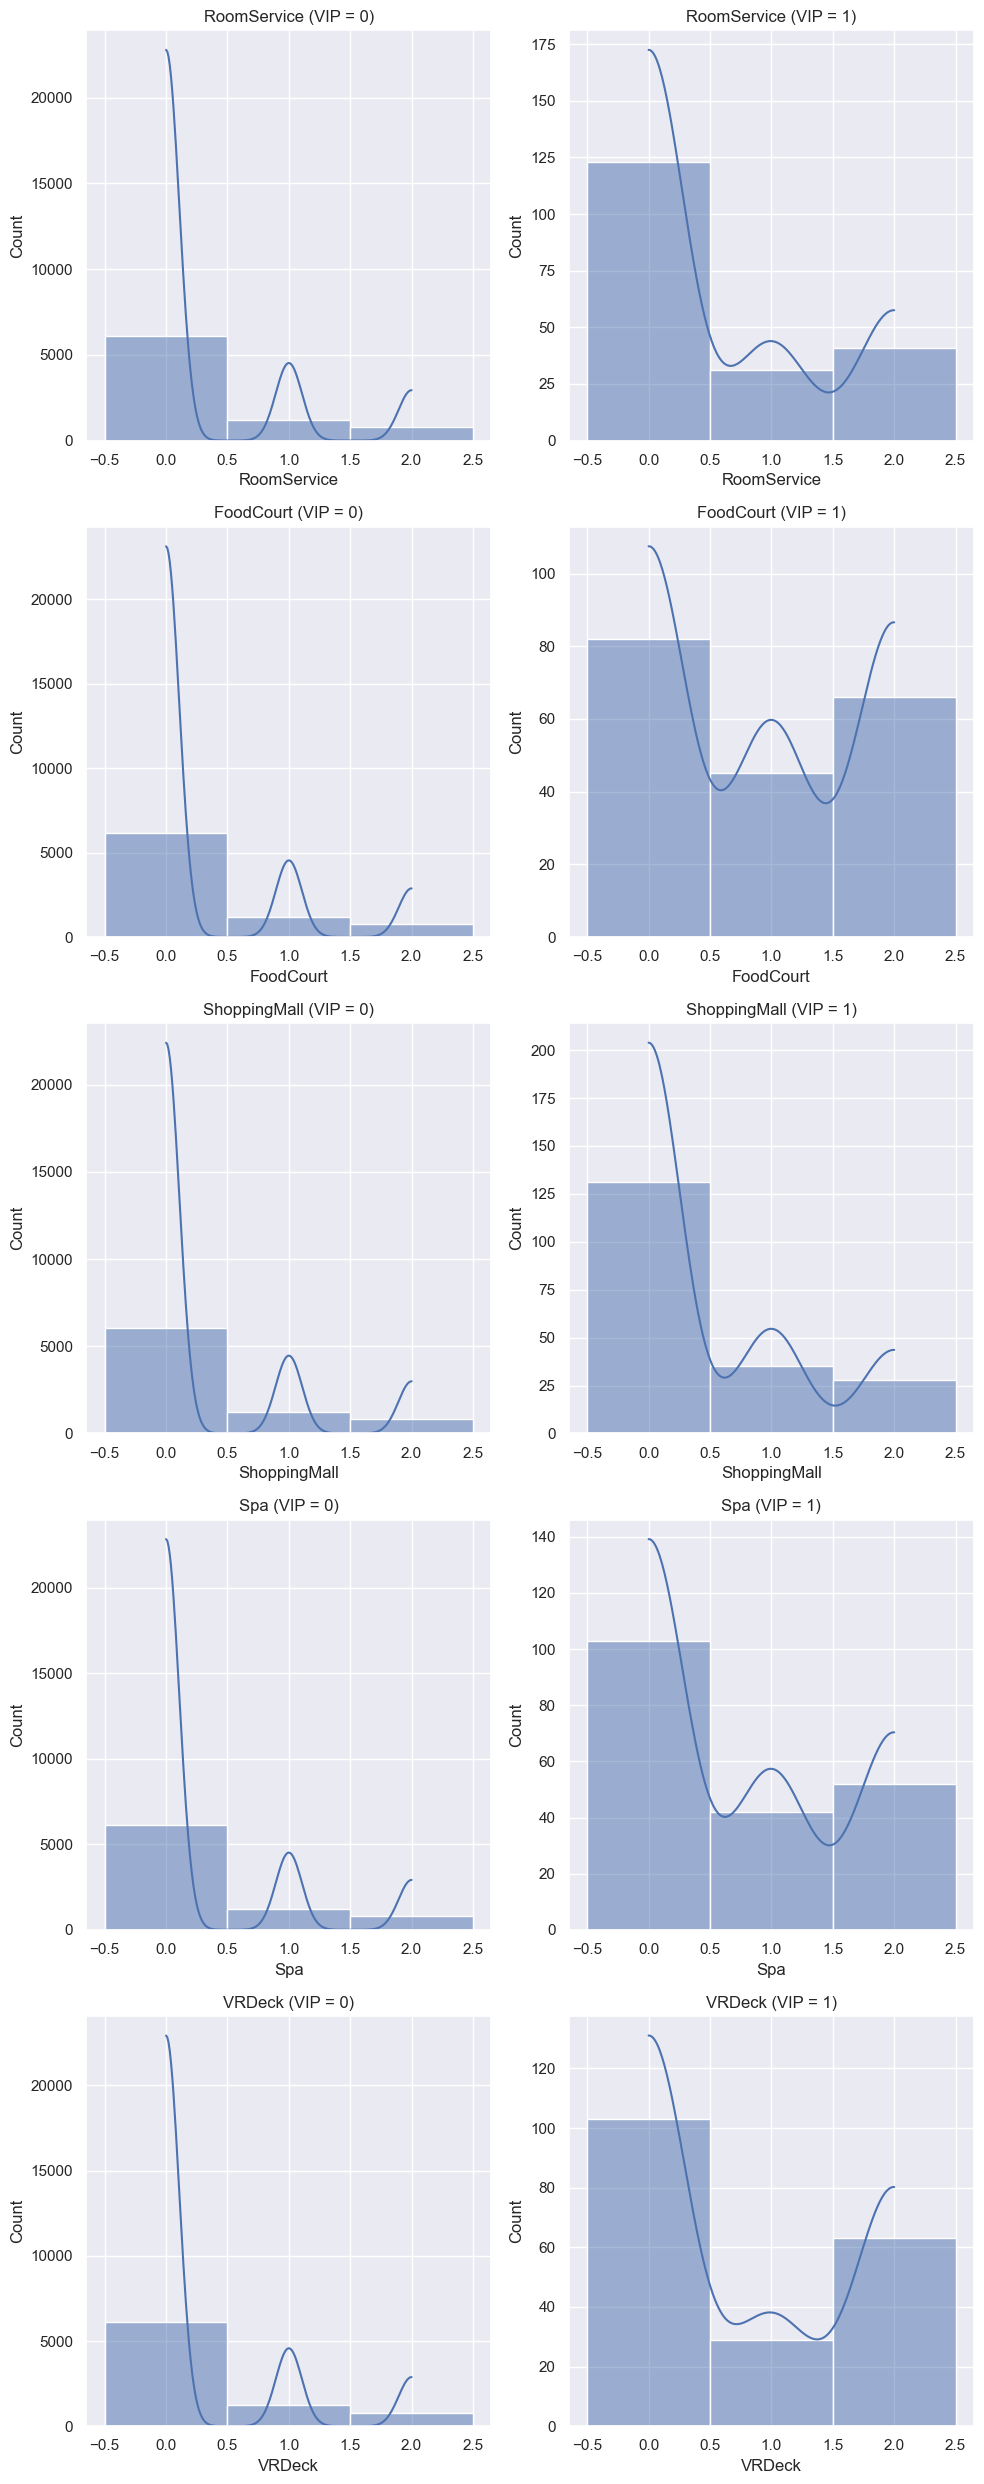

In [261]:
plot_diff(hypotesis, f, "VIP")

Становится видно, что VIP статус не зависит от потраченных средств (хотя это совершенно логичное предположение!).

### Age

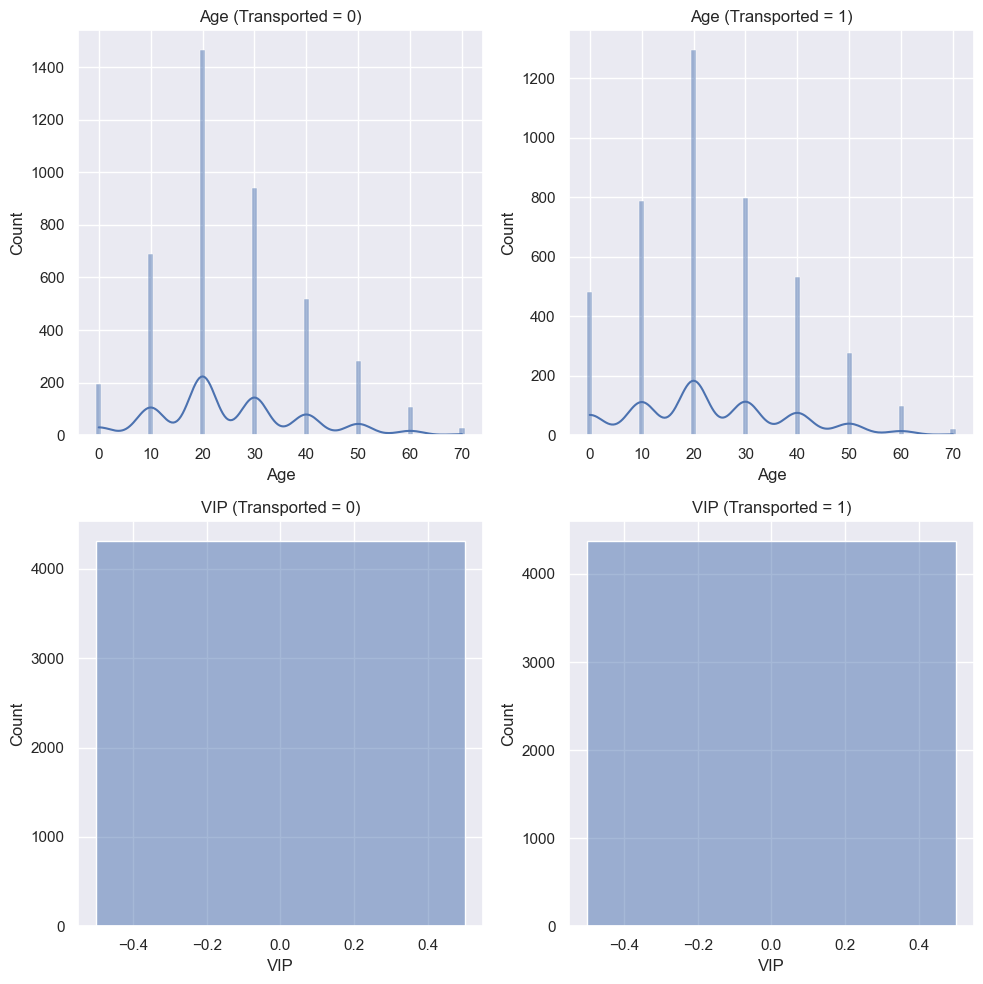

In [271]:
labels = [0, 1, 2]  # Названия категорий

f = ["Age", "Age"]
hypotesis = train.copy()
for e in f:
    hypotesis[e] = pd.cut(train[e], bins=range(0, 85, 10), right=False, labels=range(0, 73, 10), duplicates="drop")

plot_diff(hypotesis, f, "Transported")

Видно, что более люди до 10 лет имеют аномально большие шансы на транспортировку! Разницу в данных других возрастов можно списать на статистическую погрешность.

# Резюме

1) Transported прямо коррелирует с CryoSleep.
2) Также, видно, что Deck коррелирует с Group - при попытке заполнить NaN в одной из этих категорий можно ориентироваться на другую.
3) Transported обратно коррелирует с потраченными средствами (признаки RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
4) Есть зависимость Transported от Deck: есть определенные Deck, в которых аномально большой процент Transported; при исследовании test можно учитывать этот факт (например, при использовании деревянных методов).
5) Есть зависимость Transported от HomePlanet - люди с Europa имеют наибольший (~65%) шанс транспортироваться.
6) Есть зависимость Transported от Age